<a href="https://colab.research.google.com/github/JackiApligian/Machine-Learning-LR--INN-Hotels/blob/main/SubmittedProject_SLC_DSBA_INNHotels_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading, manipulating and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction, tune different models and get metric scores.
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
!pip install -U scikit-learn --user
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,)

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 19.7 MB/s eta 0:00:00


In [ ]:
#mounting drive
#mounting drive
from google.colab import drive
drive.mount('/content/drive')
#loading dataset from drive
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Supervised Learning Foundations/INNHotelsGroup.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#creating a copy of the dataset to avoid changing original info
df=data.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
#checking the first few rows of the dataset
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [ ]:
#checking the last few rows of the dataset
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


**All data appears to have been imported correctly.**

In [ ]:
#Checking the shape of the dataset
df.shape

(36275, 19)

**There are 36,275 rows and 19 columns.**

In [ ]:
#Checking the information contained in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

**There are 5 columns that are objects and 14 columns that are numerical. There are no missing value so every row is filled in with something. We need to look closer at the values.**

In [ ]:
#Checking for duplicated values
df.duplicated().sum()

0

**There are no duplicated values.**

In [ ]:
#Checking the statistical summary of the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000


**Although this chart does not give us a ton of specific information, we can learn the following:**
*   **- There are 35,275 unique bookings.**
*   **- There are 4 unique meal plan options.**
*   **- There are 7 different room types**
*   **- The average lead time for reservations was ~85 days**
*   **- The average arrival year for the information in the data was 2017**
*   **- There are 5 different market segment types in the data**
*   **- The average price per room was ~ 103.42**
*   **- There were more Meal Plan 1, Room Type 1, Online and Not Cancelled bookings than the other options for that catagory**






In [ ]:
#Checking for missing values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

**There are no null values in this data**

In [ ]:
#Because each row is a unique booking, we will drop the Booking_ID column from the data
df= df.drop(['Booking_ID'], axis=1)

In [ ]:
#Checking the first 5 rows after dropping Booking_ID
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


**Booking ID was successfully dropped.**

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

**Univariate Analysis**

In [ ]:
#funtion to create histogram boxplots
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # note the percentage

    plt.show()

**Starting with the leading questions above, we will explore the data.**

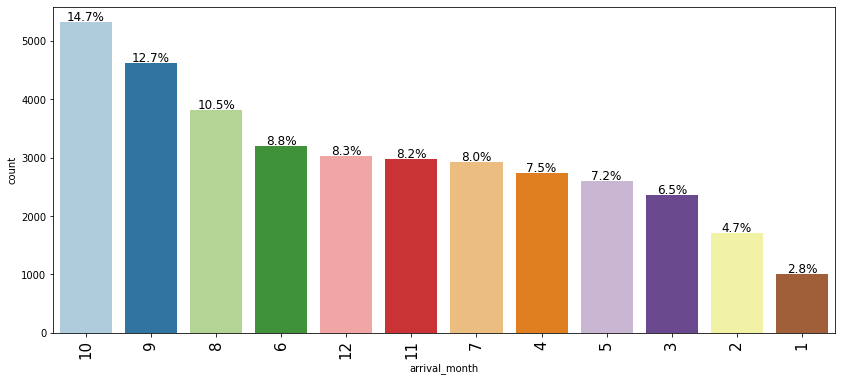

In [ ]:
# What are the busiest months in the hotel?
labeled_barplot(df,'arrival_month', perc=True)

**The busiest months at the hotel are October, September and August.**

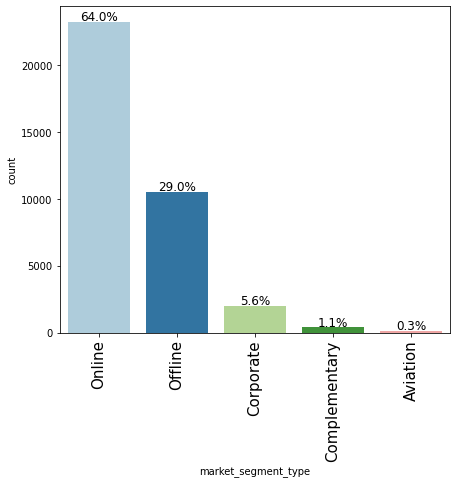

In [ ]:
  # Which market segment do most of the guests come from?
  labeled_barplot(df,"market_segment_type", perc=True)

**The vast majority of market segment is found in online bookings at 64%.**

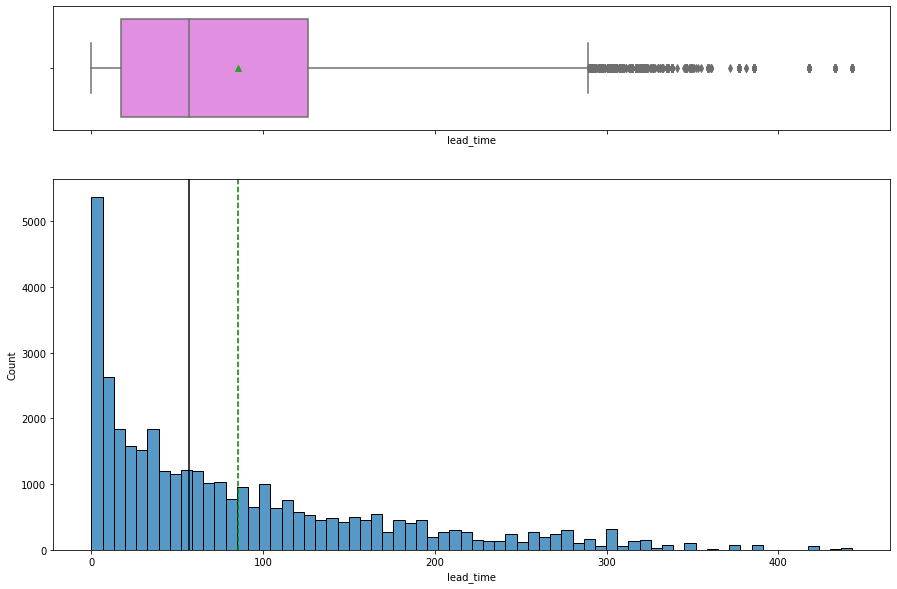

In [ ]:
# Lead Time observations
histogram_boxplot(df, "lead_time")

**Most bookings have very little lead time of just a few days. The median is around 50 days and the mean is around 80 days.**

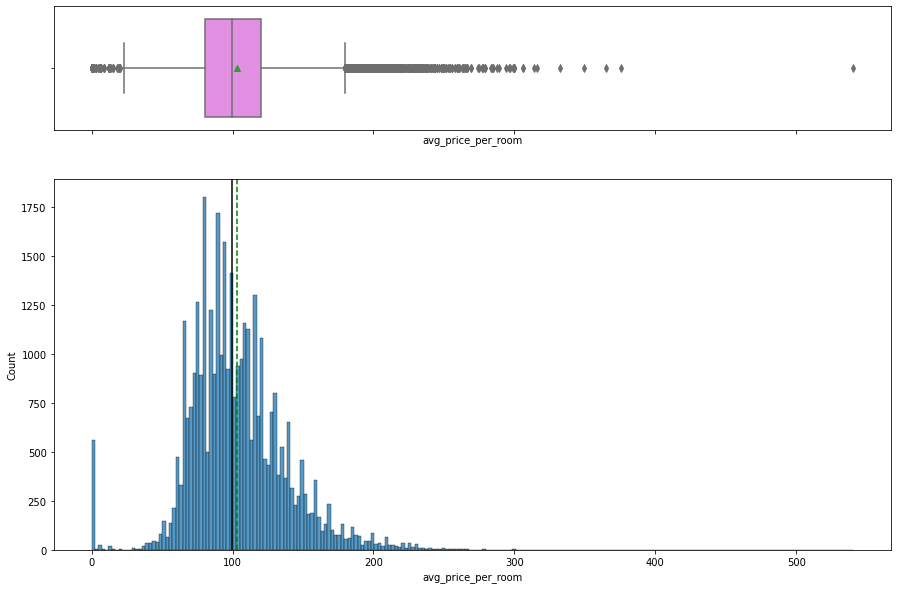

In [ ]:
# Average Room Price observations

histogram_boxplot(df,'avg_price_per_room')

**The average price follows a relatively normal distribution pattern with the median and mean around 100. There are a over 500 entries that have a 0 in the price per room column. This will need to be explored.**
**According to the boxplot, there are extreme outliers in the over 500 range. These outliers could skew the data and will need to be treated.**

In [ ]:
# Digging deeper into the number of entries with "0" in the average price per room column.
df[df["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,Not_Canceled


**There are 545 rows that have a "0" in the average price per room column.**

In [ ]:
df.loc[df["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

**The majority of the "0" entries are complementary bookings. This could be accurate due to the nature of the market share. The question is whether the Online bookings that have a "0" are a mistake or not. Because the rest of the data appears to accurate, we will assume that the online bookings with a "0" are as well.**

In [ ]:
# Treating the extreme outliers

# Calculating the 25th and 75th quantile and IQR
Q1 = df["avg_price_per_room"].quantile(0.25)
Q3 = df['avg_price_per_room'].quantile(0.75)

IQR= Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [ ]:
# Replacing the outliers over 500 with the upper whisker amount
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

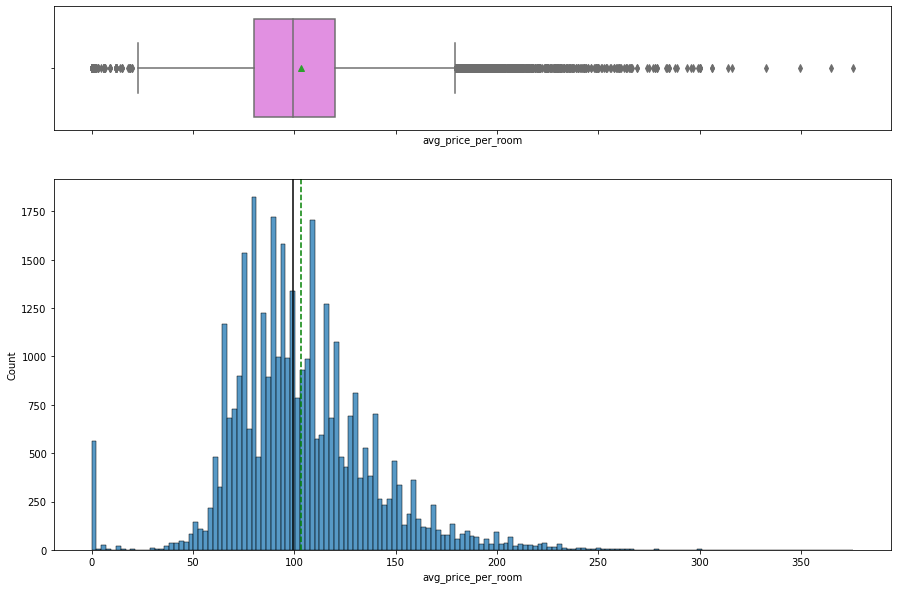

In [ ]:
#Checking the boxplot with the outliers corrected
histogram_boxplot(df,'avg_price_per_room')


**The outliers have been successfully handled.**

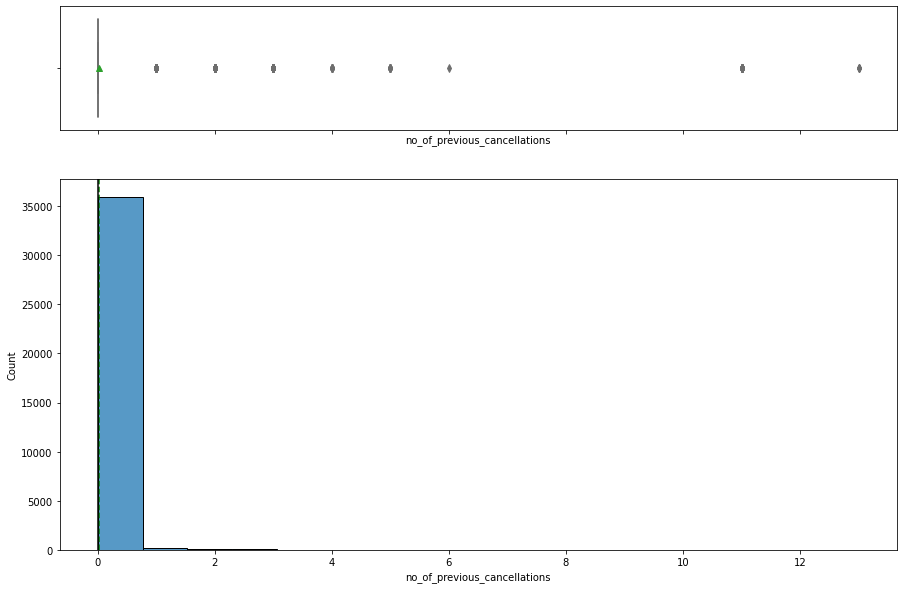

In [ ]:
# Previous Booking Cancellation observations
histogram_boxplot(df,'no_of_previous_cancellations') 

**The majority of previous cancellations have only happened once with both the median and mean at 0. However there are 35,000 of them. The highest number of cancellations is over 12 with a number of cancellations between the two extremes.**

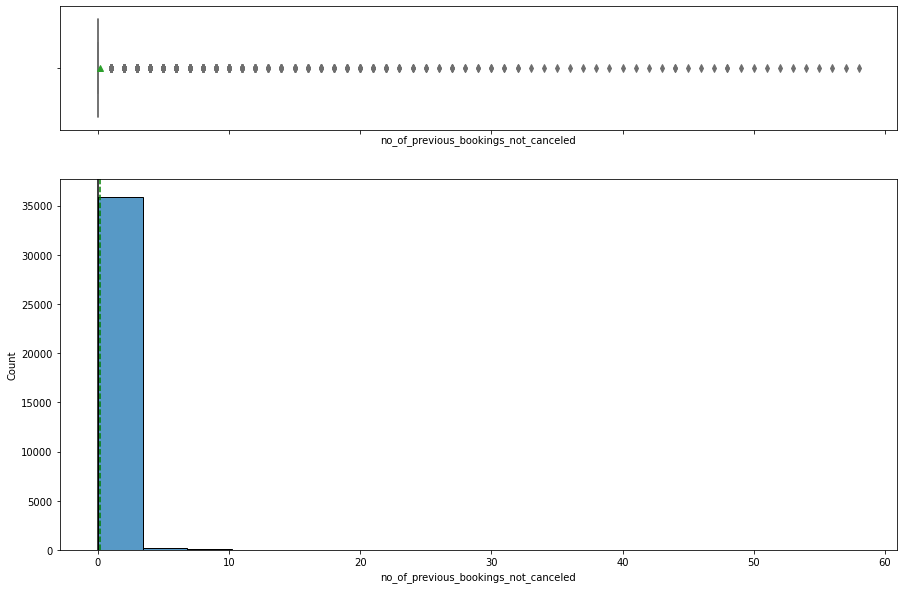

In [ ]:
# Previous Bookings Not Cancelled observations
histogram_boxplot(df,'no_of_previous_bookings_not_canceled')

**The number of previous bookings that were NOT cancelled is also only once with both the median and mean at 0. There are around 35,000 of these bookings as well. The highest number of NONE cancellations is a little less than 60 with many data points between 0 and 60.**

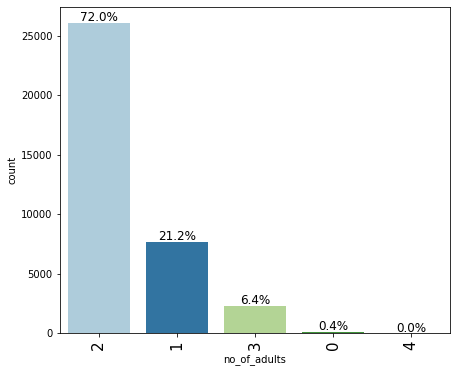

In [ ]:
#Number of Adult observations
labeled_barplot(df, "no_of_adults", perc=True)

**The majority of bookings have 2 adults at 72%. Interestingly, the number of bookings with 0 adults is .4% and with 4 adults is 0%.**

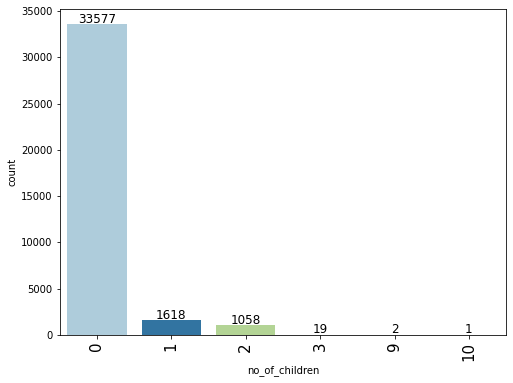

In [ ]:
#Number of Children observations
labeled_barplot(df,'no_of_children')

**There were 33,577 bookings with 0 children. 1618 with 1 child, 1058 with 2 children and 19 with 3 children. There are 3 extreme outliers with 9 and 10 children that need to be handled so they don't skew the data.** 

In [ ]:
# replacing the 9 and 10 children with the next highest number which is 3
df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

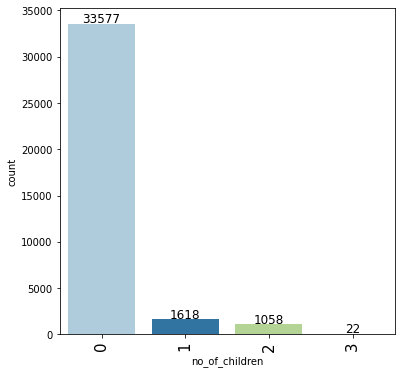

In [ ]:
#rerunning the barplot
labeled_barplot(df,'no_of_children')

**The data was corrected.**

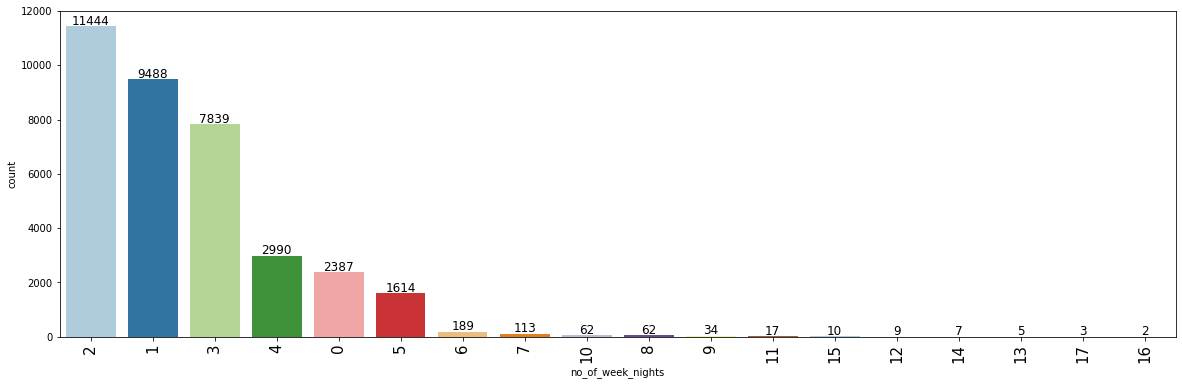

In [ ]:
#Number of Week Nights observations 
labeled_barplot(df,'no_of_week_nights')

**The majority of bookings were for between 1-3 nights with 2 nights being the most common. The most nights spend was 16 with 2 bookings with that stay.**

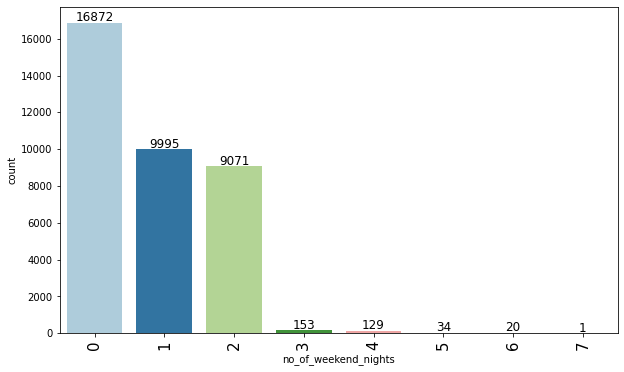

In [ ]:
#Weekend Night observations
labeled_barplot(df,'no_of_weekend_nights')

**The most bookings were not on the weekend nights with 16,872 at 0. However, the majority of weekend night bookings were for 1 and 2  weekend nights.**

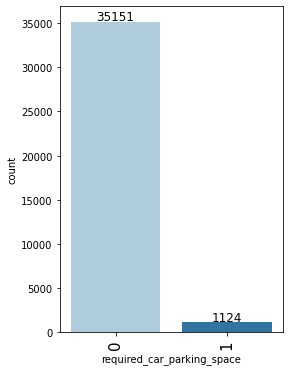

In [ ]:
#Car Parking Spaces observations
labeled_barplot(df,'required_car_parking_space')

**The majority of bookings did not require a car parking space.**

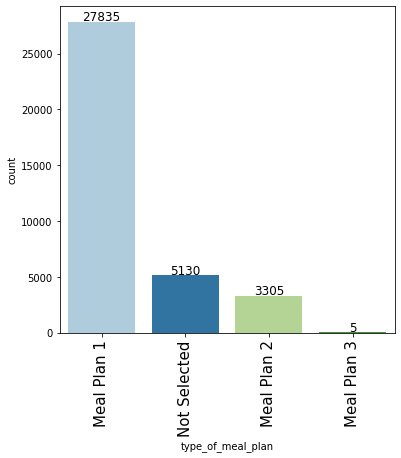

In [ ]:
#Meal Plan observations
labeled_barplot(df,'type_of_meal_plan')

**27,835 guests chose Meal Plan 1 for their stay. 5,130 did not chose a meal plan and 3,305 chose Meal Plan 2. Only 5 guests choose Meal Plan 3.**

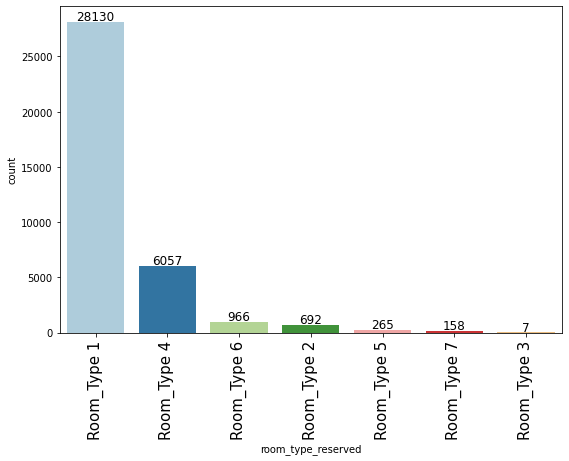

In [ ]:
#Room Type observations
labeled_barplot(df,'room_type_reserved')

**28,130 people chose Room Type 1 making it a clear favorite. The next most popular room was Room Type 4 with 6,057 bookings. The least popular was Room Type 3 with only 7 bookings.**

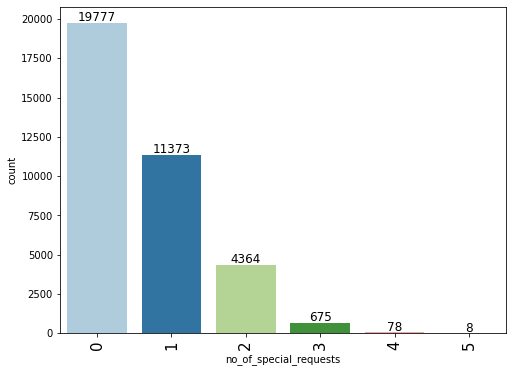

In [ ]:
#Special Request observations
labeled_barplot(df,'no_of_special_requests')

**19,777 bookings did not have any special requests. 11,373 had 1 special requests, 4,364 had 2 special requests.**

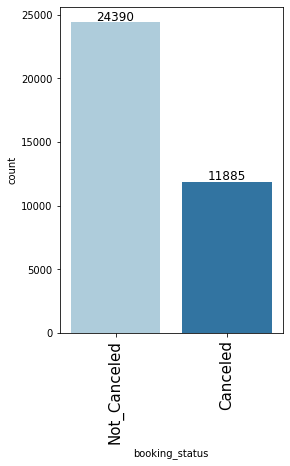

In [ ]:
#Booking Status observations
labeled_barplot(df,'booking_status')

**There were 24,390 bookings that were NOT cancelled and 11,885 bookings that were cancelled. Since these variables are objects, they will need to be converted to numerical data for comparison.**

In [ ]:
#Changing NOT Canceled to 0 and Canceled to 1
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [ ]:
#Checking to make sure changes were made to Booking Status
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,1


**The column was changed.**

**Bivariate Analysis**

In [ ]:
#Creating functions for bivariate analysis

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

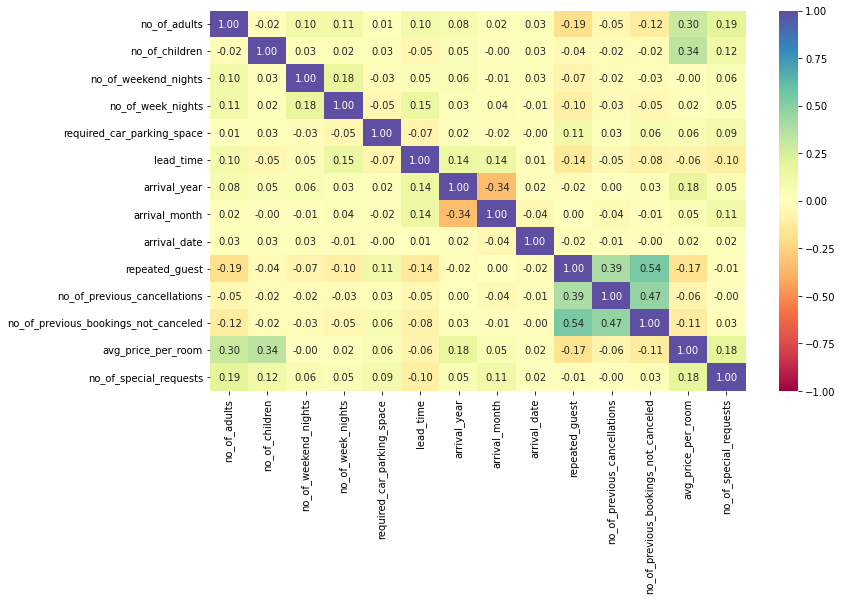

In [ ]:
#Creating heatmap of data
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**The heat map shows the highest coorelation between the number of NONcancelled reservations and repeat guests. There is also a relationship between previous cancellations and not cancelled resercations. There is also a relationship between repeat guests and previous cancellations. There is coorelation beteen the number of adults and children and the average price per room as well.**

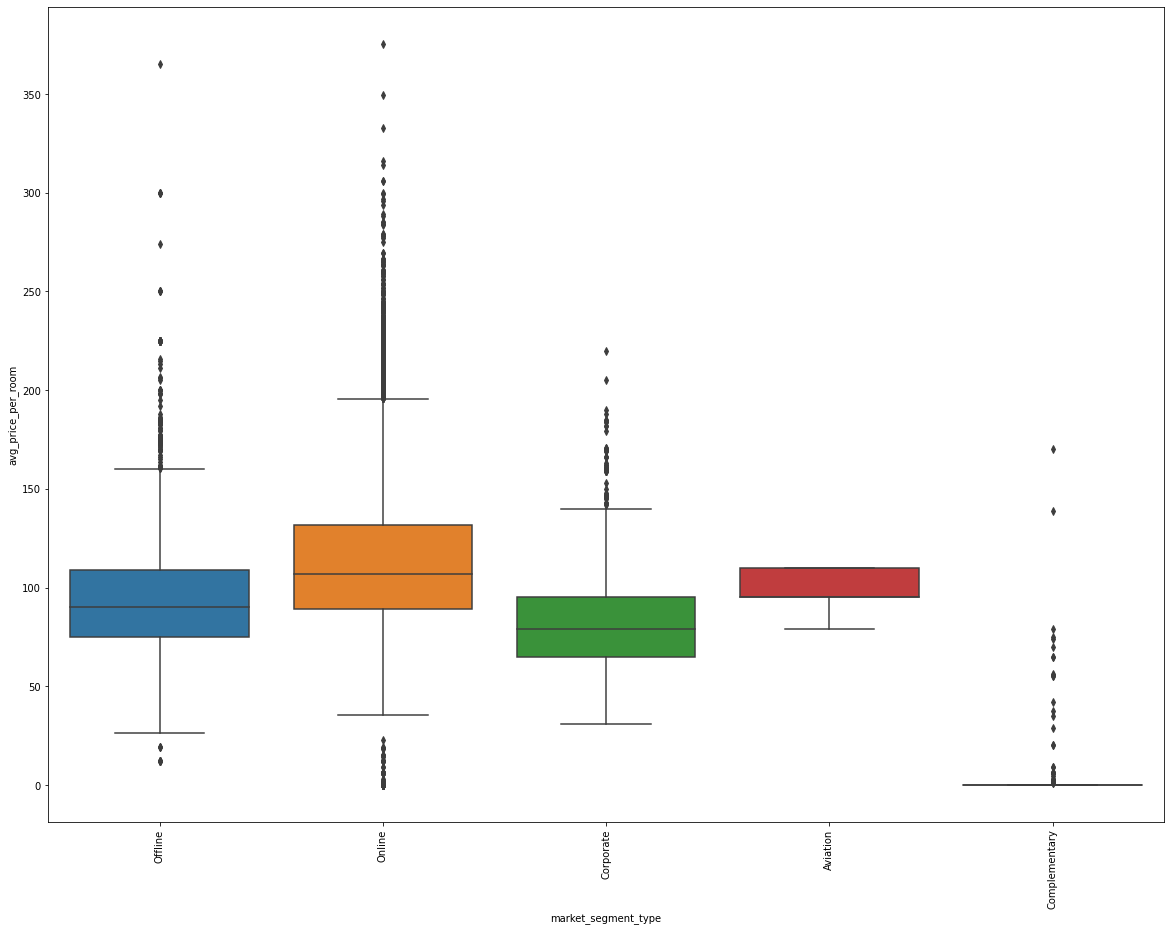

In [ ]:
#How does the Market Segment affect Price per Room
plt.figure(figsize=(20, 15))
sns.boxplot(data=df, x="market_segment_type", y="avg_price_per_room")
plt.xticks(rotation=90)
plt.show()

**Offline reservations are cheaper than online. Online is the most expensive. Corporate is the cheapest between online, offline and aviation. Aviation is between off and online bookings. Complimentary is the lowest but has a high number of outliers that don't make much sense with the label. Online bookings have the most range in cost of all of the options.**

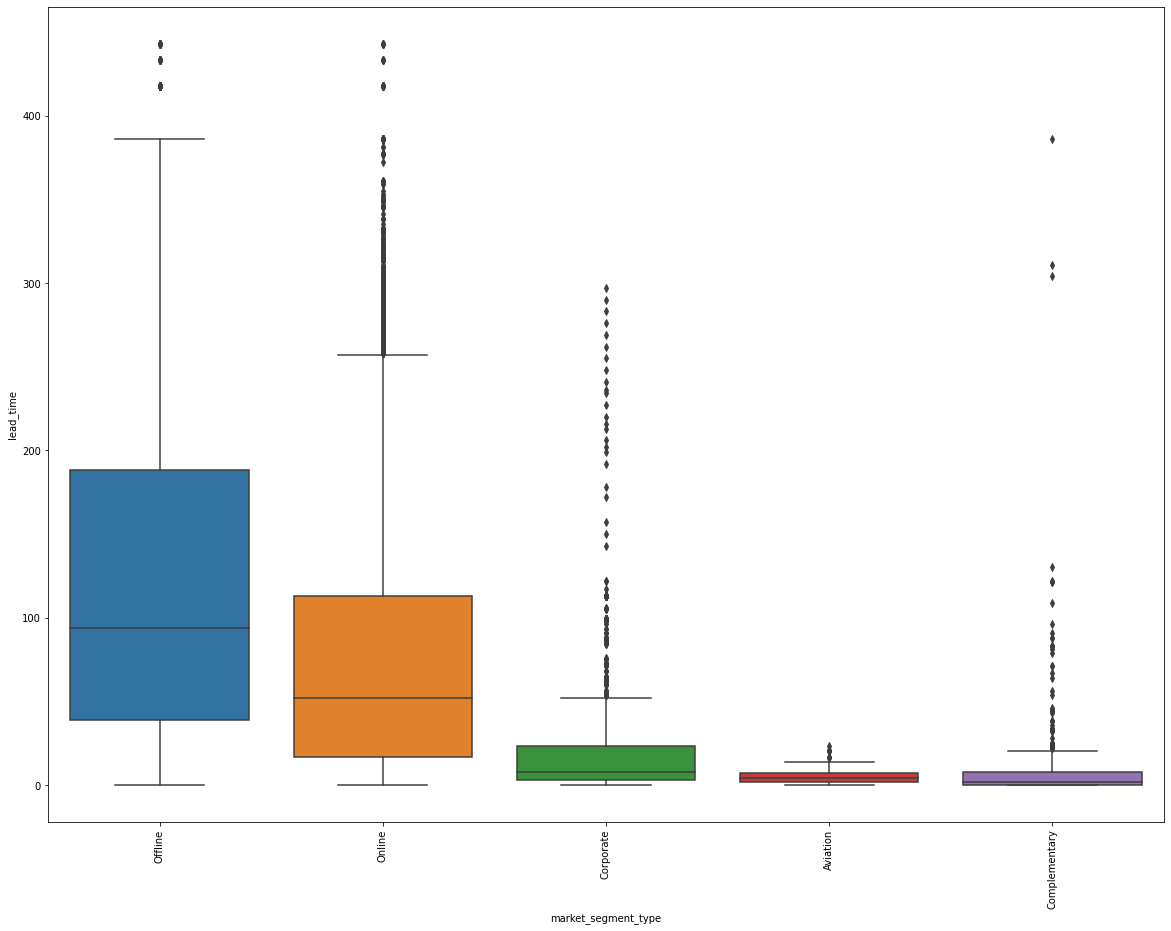

In [ ]:
#How does the Market Segment affect Price per Room
plt.figure(figsize=(20, 15))
sns.boxplot(data=df, x="market_segment_type", y="lead_time")
plt.xticks(rotation=90)
plt.show()

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


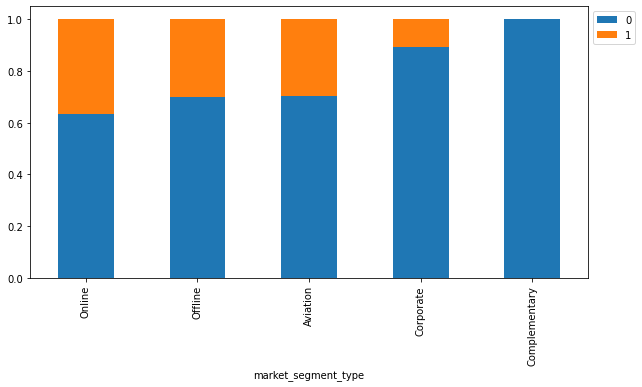

In [ ]:
#How does average room price influence booking status 
# NOT Canceled = 0 and Canceled = 1
stacked_barplot(df, "market_segment_type", "booking_status")

**The majority of bookings do not cancel. However, A slightly higher percentage of online reservations do cancel followed by offline and aviation cancellations. None of the complementary bookings were canceled.**

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


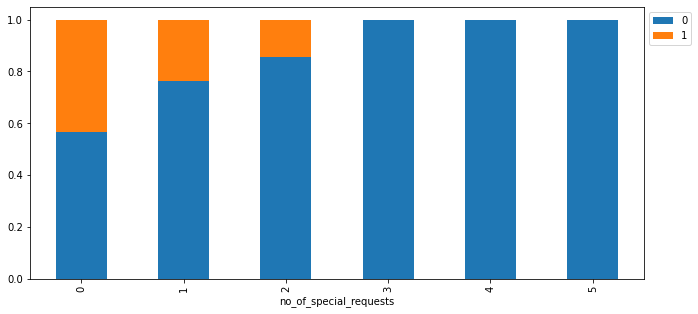

In [ ]:
#How do Special requirements impact cancellations
# NOT Canceled = 0 and Canceled = 1
stacked_barplot(df, "no_of_special_requests", "booking_status")

**It appears that the more special requirements that the guest request, the less likely they are to cancel their reservation. This is an interesting coorelation.**

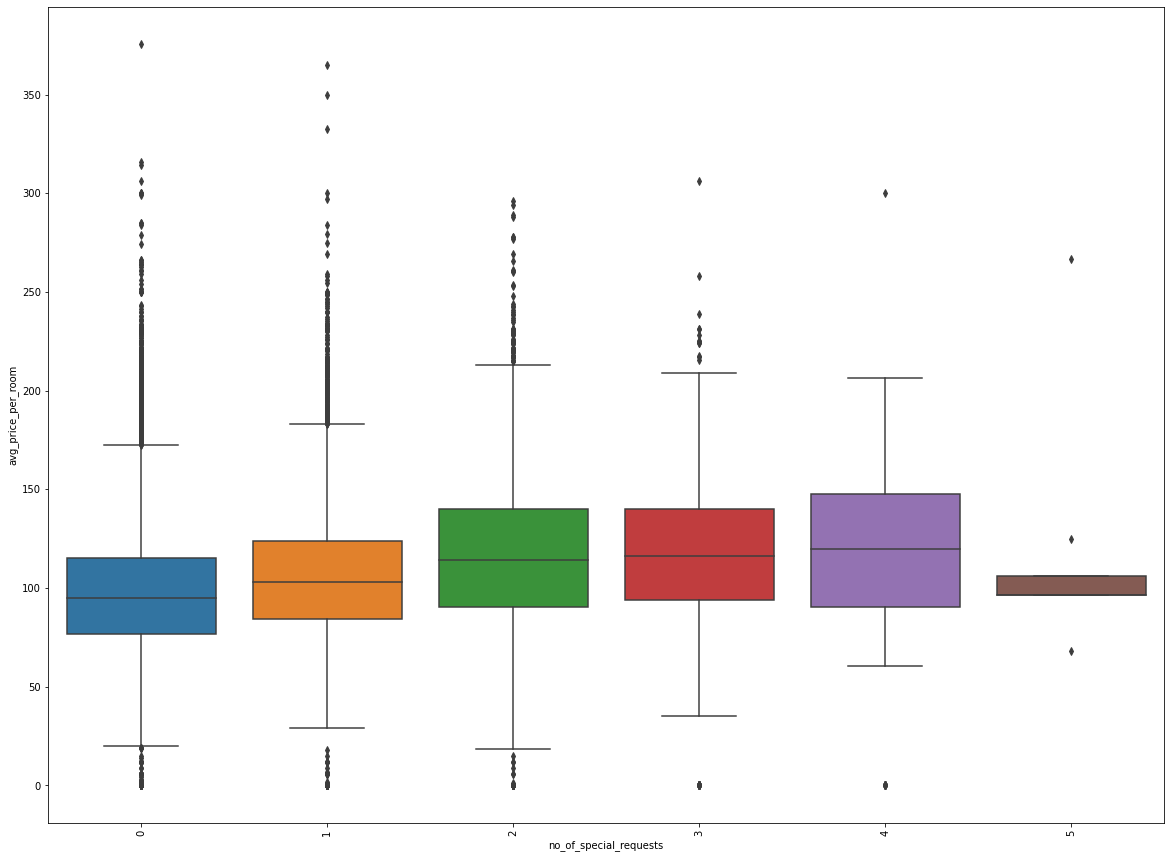

In [ ]:
#How do those special requests influence the price of the room?
plt.figure(figsize=(20, 15))
sns.boxplot(data=df, x="no_of_special_requests", y="avg_price_per_room")
plt.xticks(rotation=90)
plt.show()

**As the number of special requirements goes up so does the avereage price of the room. Until we reach 5 special requirements and then the average price drops below the others. 2 special requirements has the largest range of average price per room.**

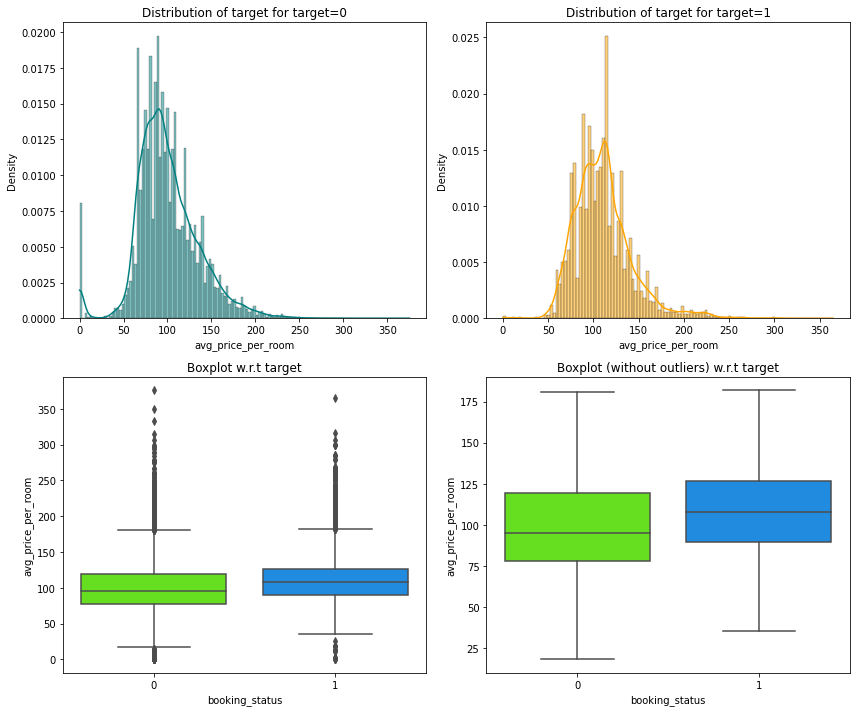

In [ ]:
#What is the coorelation between booking status and the price per room?
# NOT Canceled = 0 and Canceled = 1
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

**The distribution for not cancelled average price per room is slightly skewed to the left showing that the rooms that were not cancelled appear to be slightly cheaper than the average price for the cancelled rooms. This holds when looking at the boxplot data** 

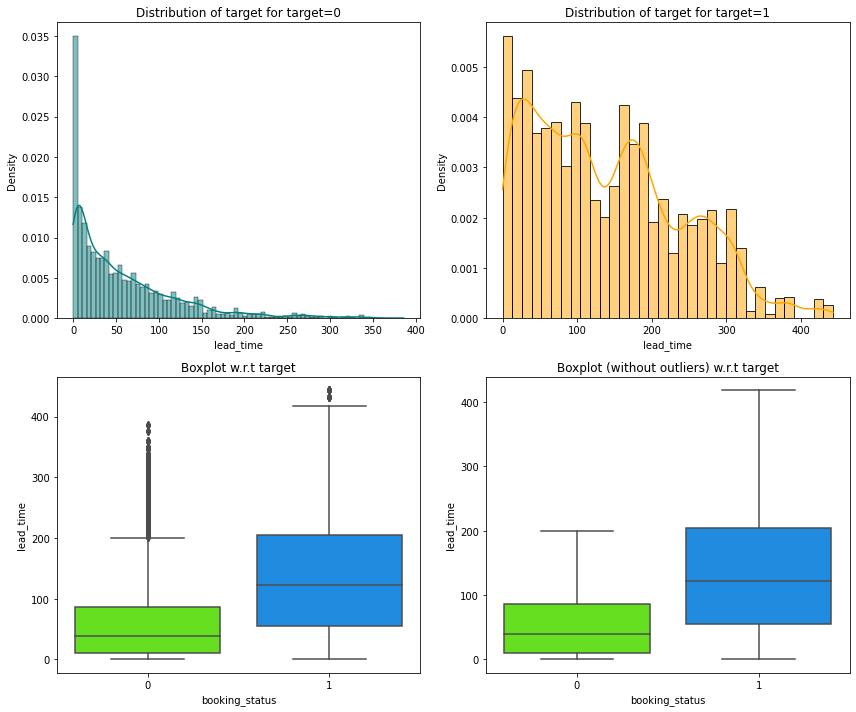

In [ ]:
#What is the coorelation between booking status and the lead time?
# NOT Canceled = 0 and Canceled = 1
distribution_plot_wrt_target(df, "lead_time", "booking_status")

**According to these charts, it appears that the less lead time the more likely there will not be a cancellation. These variables appears to be very coorelated.**

In [ ]:
#How does family travel coorelate with cancellations?
#creating a new dataframe for family travel
family_travel = df[(df["no_of_children"] >= 0) & (df["no_of_adults"] > 1)]
family_travel.shape

(28441, 18)

**There were 28,441 families that traveled together with more an 0 children and more than 1 adult in this dataset.**

In [ ]:
#combining the number of people in the family
family_travel["no_of_family_members"] = (
    family_travel["no_of_adults"] + family_travel["no_of_children"]
)

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


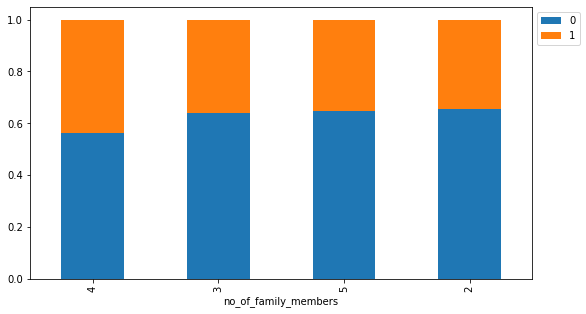

In [ ]:
#How does traveling as a family affect cancelations?
# NOT canceled = 0 Canceled = 1
stacked_barplot(family_travel,'no_of_family_members', 'booking_status')

**There was a slightly higher percentage of cancelations for families of 4 but a high number of cancelations for families with 3, 5 and 2 in their parties as well. Familes have a high cancelation rate across the board with over half of all families cancelling their bookings.**

In [ ]:
#Analyzing people who stay at least one day at the hotel
stay_length = df[(df["no_of_week_nights"] > 0) & (df["no_of_weekend_nights"] > 0)]
stay_length.shape

(17094, 18)

**17,094 bookings stayed more than 0 days at the hotel.**

In [ ]:
stay_length["total_days"] = (
    stay_length["no_of_week_nights"] + stay_length["no_of_weekend_nights"])

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

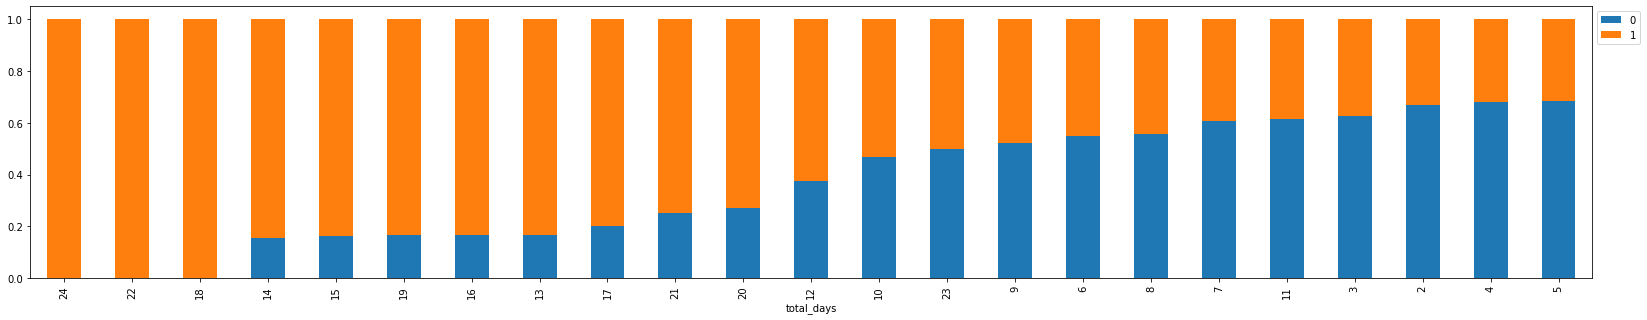

In [ ]:
#How does the length of stay influence cancellations
# NOT canceled = 0 Canceled = 1
stacked_barplot(stay_length,'total_days', 'booking_status')

**The more days of the stay, the higher chance of cancellation. 5 days or less appear to have the least number of cancellations with a few exceptions such as 11 days and 7 days.**

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


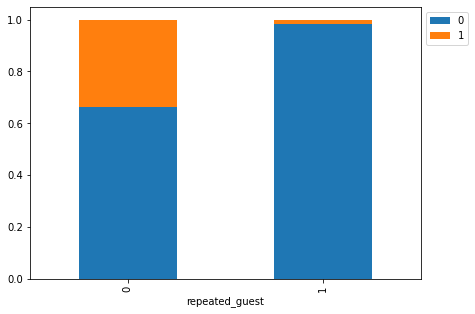

In [ ]:
#What percentage of repeat guests cancel their bookings?
# NOT canceled = 0 Canceled = 1
# NOT repeat guest = 0 Repeat guest = 1
stacked_barplot(df,'repeated_guest', 'booking_status')

**The majority of cancellations come from new guests. Repeat guests have a very low percentage of cancellations.**

In [ ]:
#How does the arrival month affect the number of cancellations?

#Let's group the arrival months and booking status and create a new dataframe with that information.
monthly_arrival = df.groupby(["arrival_month"])["booking_status"].count()

monthly_arrival = pd.DataFrame(
    {"Month": list(monthly_arrival.index), "Guests": list(monthly_arrival.values)})


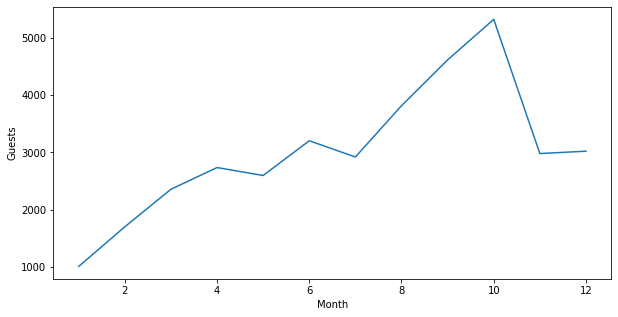

In [ ]:
#plotting the new dataframe
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_arrival, x="Month", y="Guests")
plt.show()

**There is a sharp fall in bookings starting in January with a slow climb through May. Bookings are most popular months are from August through November.**

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


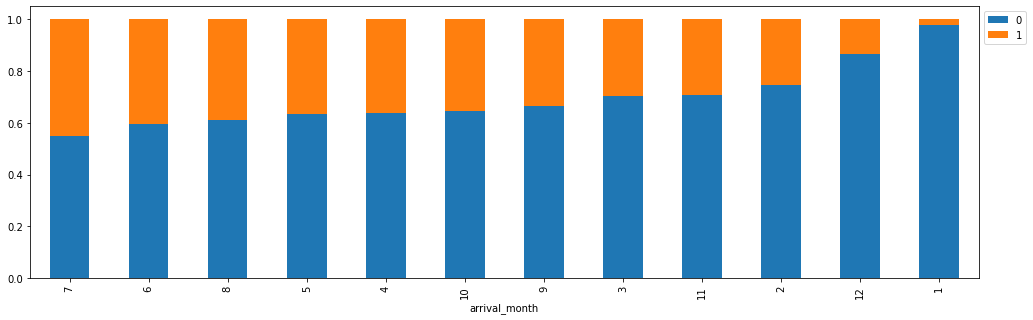

In [ ]:
#How many bookings are cancelled each month?
# NOT canceled = 0 Canceled = 1
stacked_barplot(df,'arrival_month','booking_status')

**The highest percentage of cancellations are in the month of July. The least amount of cancellations are in the month of January. But according to our last plot, January has the least amount of bookings as well. November is a popular month and has a lesser percentage of cancellations than the summer months.**

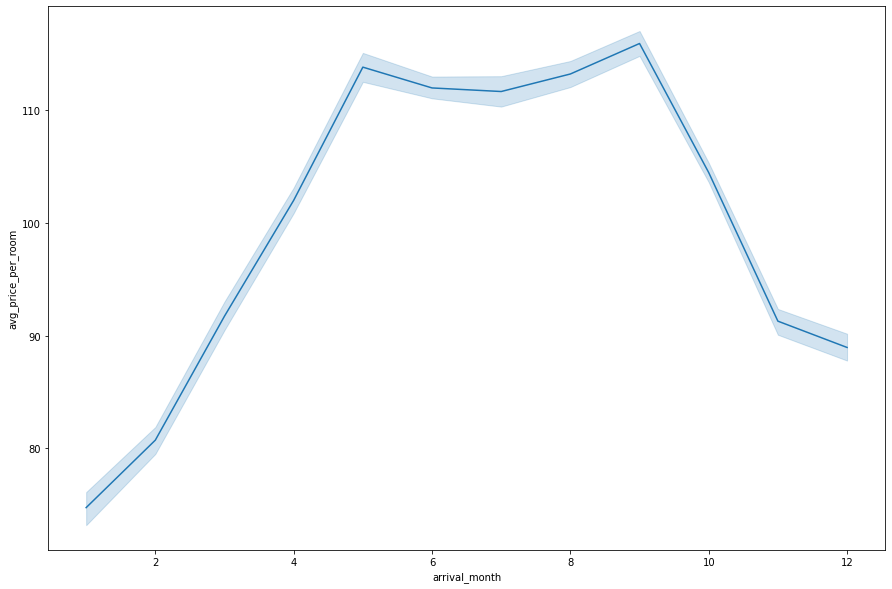

In [ ]:
#Does the price per room change due to the month of the reservation?
plt.figure(figsize=(15, 10))
sns.lineplot(data=df, y='avg_price_per_room',x='arrival_month') 
plt.show()

**Not surprisingly, the peak months of the summer see an increase in the average price per room. This increase begins in May and lasts through September. November, however, showed to be a very popular month at the hotel with a lesser percentage of cancellations and now shows to have a lower price per room as well.**

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

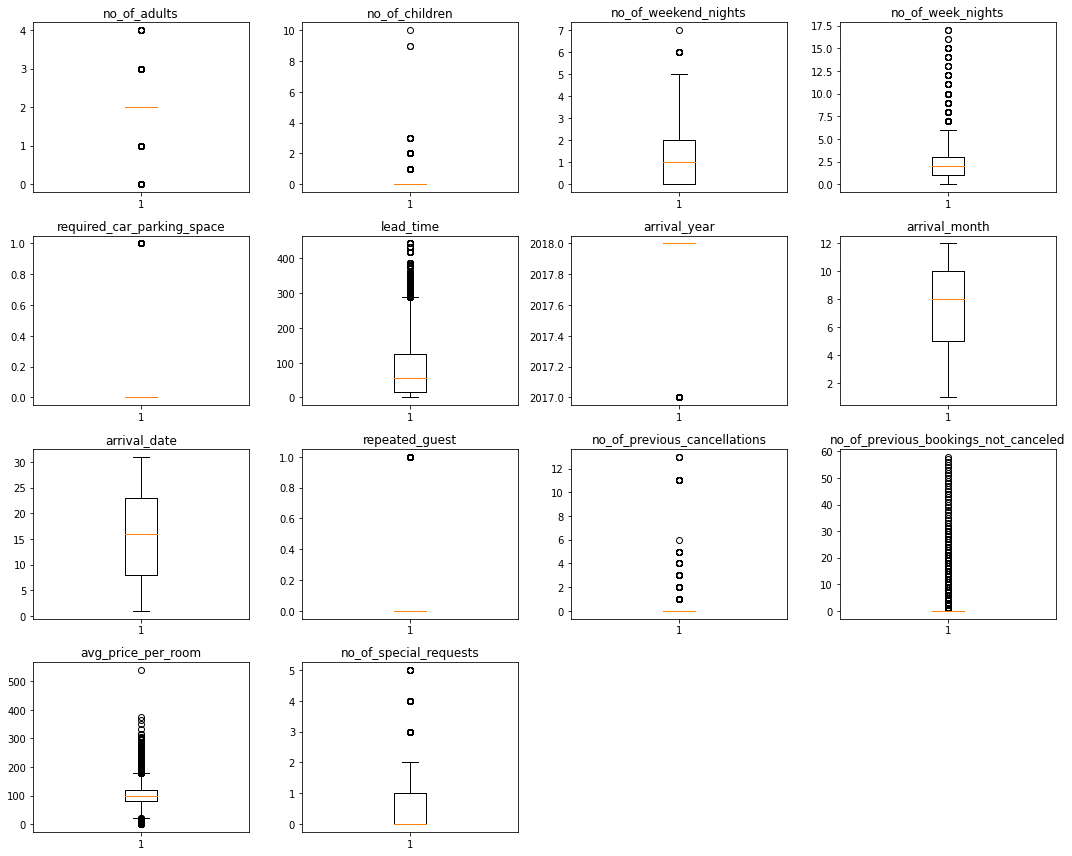

In [ ]:
#Looking for outliers using boxplot. Dropping booking status as a numerical column due to the nature of the data.
number_data = df.select_dtypes(include=np.number).columns.tolist()
number_data.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(number_data):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**The only oulier of concern would be the number of children at 9 and 10. However, since this is actual data points, I will not remove them at this time.**

In [ ]:
#checking for missing values
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

**There are no missing values in the data.**

In [ ]:
# defining a function that will find different metrics so we can check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(    model, predictors, target, threshold=0.5):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    #which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # Accuracy
    recall = recall_score(target, pred)  # Recall
    precision = precision_score(target, pred) # Precision
    f1 = f1_score(target, pred)  #  F1-score

    # Dataframe of the metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# Function for confusion_matrix plotting of classification model
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Because we are wanting to predict whether or not a booking will be cancelled, we will set the dependent variable as Booking Status and begin to prepare the data for modeling.**

In [ ]:
#Splitting the data into testing and training sets
#independent variables
X = df.drop(["booking_status"], axis=1)
#dependent variable
Y = df["booking_status"]

# adding intercept
X = sm.add_constant(X) 
#creating dummies for object type data
X = pd.get_dummies(X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True)
X.head()

#spliting the data into 70% training and 30% testing  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


**Successfully split the data into testing and training. There are 25,392 rows and 28 columns in the training set which account for 67% of the data. There are 10,883 rows and 28 columns in the test set which accounts for 33% of the data.**

In [ ]:
X_train.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
13662,1.00000,1,0,0,1,0,163,2018,10,15,0,0,0,115.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
26641,1.00000,2,0,0,3,0,113,2018,3,31,0,0,0,78.15000,1,0,0,0,1,0,0,0,0,0,0,0,0,1
17835,1.00000,2,0,2,3,0,359,2018,10,14,0,0,0,78.00000,1,0,0,0,0,0,0,0,0,0,0,0,1,0
21485,1.00000,2,0,0,3,0,136,2018,6,29,0,0,0,85.50000,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5670,1.00000,2,0,1,2,0,21,2018,8,15,0,0,0,151.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**Dummies were created for Meal Plan, Room Type and Market Segment data.**

## Building a Logistic Regression model

In [ ]:
#fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Mon, 09 Jan 2023   Pseudo R-squ.:                  0.3292
Time:                        23:04:24   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

Negative values of the coefficient shows that probability of guest cancelling their reservation decreases with the increase of corresponding attribute value.

Positive values of the coefficient show that that probability of guest cancelling their reservation increases with the increase of corresponding attribute value.

p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

But these variables might contain multicollinearity, which will affect the p-values.

We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

We will use the VIF to remove multicollinearity.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
#Checking Multicollinearity using VIF
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  39497686.20788
no_of_adults                                  1.35113
no_of_children                                2.09358
no_of_weekend_nights                          1.06948
no_of_week_nights                             1.09571
required_car_parking_space                    1.03997
lead_time                                     1.39517
arrival_year                                  1.43190
arrival_month                                 1.27633
arrival_date                                  1.00679
repeated_guest                                1.78358
no_of_previous_cancellations                  1.39569
no_of_previous_bookings_not_canceled          1.65200
avg_price_per_room                            2.06860
no_of_special_requests                        1.24798
type_of_meal_plan_Meal Plan 2                 1.27328
type_of_meal_plan_Meal Plan 3                 1.02526
type_of_meal_plan_Not Selected                1

**VIF for Online reservations is very high and will be the first variable to be dropped. We will reassess after dropping Online.**

In [ ]:
X_train1 = X_train.drop("market_segment_type_Online", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                  39420296.70131
no_of_adults                                  1.33469
no_of_children                                2.09256
no_of_weekend_nights                          1.06905
no_of_week_nights                             1.09516
required_car_parking_space                    1.03984
lead_time                                     1.39089
arrival_year                                  1.42943
arrival_month                                 1.27528
arrival_date                                  1.00678
repeated_guest                                1.78025
no_of_previous_cancellations                  1.39545
no_of_previous_bookings_not_canceled          1.65176
avg_price_per_room                            2.06778
no_of_special_requests                        1.24315
type_of_meal_plan_Meal Plan 2                 1.27293
type_of_meal_plan_Meal Plan 3                 1.02526
type_of_meal_plan_Not Selected                1

**Removing that once variable corrrected excessive multicollinearity.**

In [ ]:
#Running the logistic regression model again
#fitting logistic regression model
logit = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Mon, 09 Jan 2023   Pseudo R-squ.:                  0.3291
Time:                        23:04:28   Log-Likelihood:                -10795.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -931.6148    120.669     -7.720      0.000   -1168.122    -695.108
no_of_adults                             0.1062      

In [ ]:
#Function to remove high P values 
# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
#Changing the columns to the manipulated columns on both test and training data
X_train2 = X_train1[selected_features]
X_test1 = X_test[selected_features]


In [ ]:
#Running the logistic regression model again
logit = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit.fit(
    disp=False
)
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Mon, 09 Jan 2023   Pseudo R-squ.:                  0.3282
Time:                        23:04:30   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600      0.000   -1151.758    -679.520
no_of_adults                       0.1088      0.037      2.914      0.

**All multicollinearity and high p value variables have been removed from the training and testng data.**

## Model performance evaluation

In [ ]:
#Checking the Training Performance
print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


In [ ]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11491,1.16546,1.11470,1.04258,0.20296,1.01583,1.57195,0.95839,0.06478,1.25712,1.01937,0.22996,1.17846,1.33109,0.70104,0.75364,0.47885,0.37977,0.23827,0.45326,0.16773
Change_odd%,-100.00000,11.49096,16.54593,11.46966,4.25841,-79.70395,1.58331,57.19508,-4.16120,-93.52180,25.71181,1.93684,-77.00374,17.84641,33.10947,-29.89588,-24.63551,-52.11548,-62.02290,-76.17294,-54.67373,-83.22724


**Coefficient Interpretations:**
We will look at the most impactful odds. All others can be intepreted in the same manner.

*   **# of Adults-** Holding all other features constant a unit change in the number of adults will increase the odds of a cancellation by 1.11 times or 11.49%
*   **# of Children-** Holding all other features constant a unit change in the number of children will increase the odds of a cancellation by 1.17 times or 16.55%.
*   **# of Weekend Nights-** Holding all other features constant a unit change in the number of Weekend Nights a guest books at the hotel will increase the odds of a cancellation by 1.11 times or 11.50%.
*   **Car Parking Spaces Needed-** Holding all other features constant a unit change in the number of required car parking spaces will decrease the odd of a cancellation by 0.20 times or 79.70%.
*  **Repeat Guests-** Holding all other features constant the fact that a guest is a repeat guest will decrease the odds of a cancellation by .065 times or 93.52%.
*   **# of Previous Cancellations-** Holding all other features constant a unit change in the number of previous cancellations from a guest will increase the odds of a cancellation by 1.26 times or 25.71%.
*   **# of Special Request-**  Holding all other features constant a unit change in the number of special requests from a guest will decrease the odds of a cancellation by .023 times or 77%.
*   **Room Types-** Holding all other features constant the type of room that a guest books will decrease the odds of cancellation in different amounts. The most impactful is Room Type 7 with a decrease in the odds of cancellation by 0.24 times or 76.17%.List item
*   **Corporate and Offline Bookings-** Holding all other features constant the type of market segment will decrease the odds of a cancellation. Offline bookings decrease the odds by 0.17 times or 83.23% while Corporate bookings decrease the odds by 0.45 times or 54.67%.













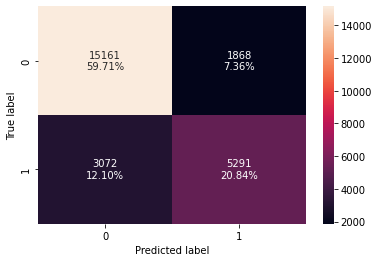

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


**The training data is able to predict a true positive around 60% of the time and a true negative around 21% of the time. The false positive rate is 7.36% and false negative rate is 12.10%. The recall and F1 are a little lower than I would like using the default threshold. Let's check the ROC curve to see if we can find a better threshold.**

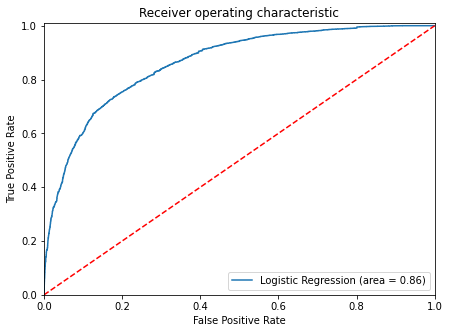

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Optimal threshold from the AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3700522558707859


In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79265,0.73622,0.66808,0.70049


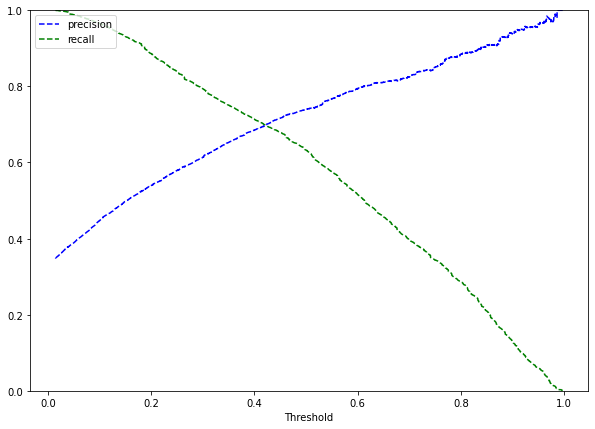

In [ ]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

**A threshold of 0.42 gives gives equal precision and recall so we will set the threshold at 0.42.**

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

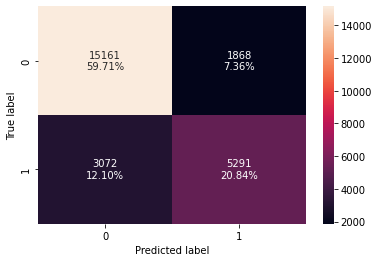

In [ ]:
# rechecking confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

**The confusion matrix has not changed.**

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80132,0.69939,0.69797,0.69868


**The accuracy has barely improved, both recall and precision have dropped and F1 is barely improved by using the optimal threshold curve of 0.42.** 
**The model is giving better performance from the AUC-ROC threshold of 0.37.**

Testing performance on the test set

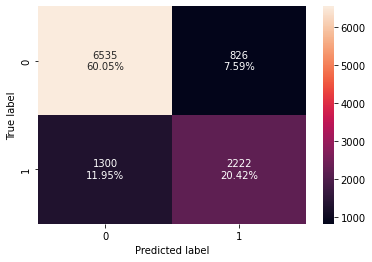

In [ ]:
#checking the model on the default threshold
# rechecking confusion matrix
confusion_matrix_statsmodels(lg2, X_test1, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


**The model is performing well using this default threshold.**

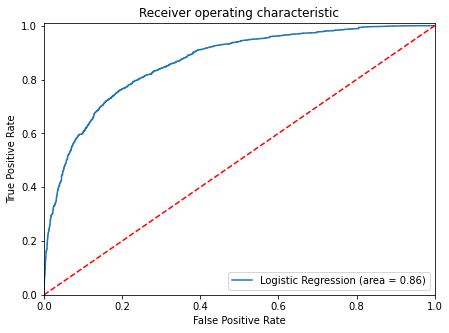

In [ ]:
#Checking the ROC curve on the test set
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold = .37**

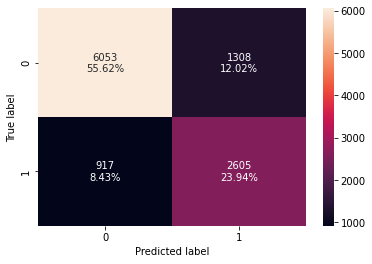

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79555,0.73964,0.66573,0.70074


**Recall has improved significantly by 0.10875. Precision dropped by 0.06327 from the default threshold. F1 increased by 0.02433 using the ROC threshold. The model is performing better with the ROC threshold of 0.37.**

**Using model with threshold = 0.42**

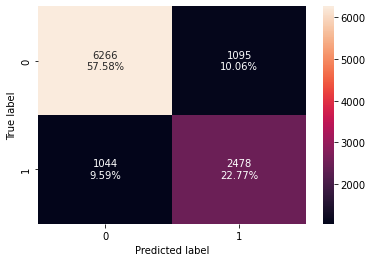

In [ ]:
 #creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test1, y_test, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80345,0.70358,0.69353,0.69852


**There is an inprovement in the False Negative portion of the confusion matrix. The numbers in the performance test are close to those with the ROC curve threshold with only recall and percision falling slightly.**

## Final Model Summary

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80545,0.79265,0.80132
Recall,0.63267,0.73622,0.69939
Precision,0.73907,0.66808,0.69797
F1,0.68174,0.70049,0.69868


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79555,0.80345
Recall,0.63089,0.73964,0.70358
Precision,0.72900,0.66573,0.69353
F1,0.67641,0.70074,0.69852


**The models are performing well on the training and test data without evidence of overfitting. The F1 value for a threshold of .37 is performing the best and so we will use .37 as our threshold going forward.**

## Building a Decision Tree model

**The goal of this project is to predict which bookings will be canceled.
Before we proceed to build a model, categorical features need to be encoded.
Splitting the data into training and testing sets will help us evaluate the model that we build on the train data.**

In [ ]:
#Splitting the data into testing and training sets
#independent variables
X = df.drop(["booking_status"], axis=1)
#dependent variable
Y = df["booking_status"]

# adding intercept
X = sm.add_constant(X) 
#creating dummies for object type data
X = pd.get_dummies(X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True)
X.head()

#spliting the data into 70% training and 30% testing  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


**The data has been split again into a training set with 25,392 rows and 28 columns and testing with 10,883 rows adn 28 columns.**

In [ ]:
# creating a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # Accuracy
    recall = recall_score(target, pred)  #  Recall
    precision = precision_score(target, pred) #Precision
    f1 = f1_score(target, pred)  # F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},index=[0],)

    return df_perf

In [ ]:
#funtion for confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
#Building the decision tree model
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

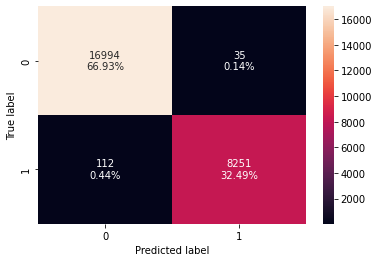

In [ ]:
#testing the model on the training data
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


**Since we are wanting to maximize recall in an effort to minimize False Negatives, this model is fitting the testing data quite well with a .99 recall.**

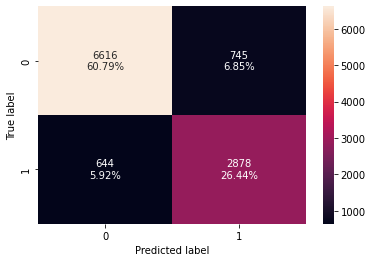

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
#Checking the model on testing data
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87237,0.81715,0.79437,0.80560


**There is a difference between the testing and training data performance but the recall remains high for the testing data at 0.82. This suggests a minimal overfitting issue.**

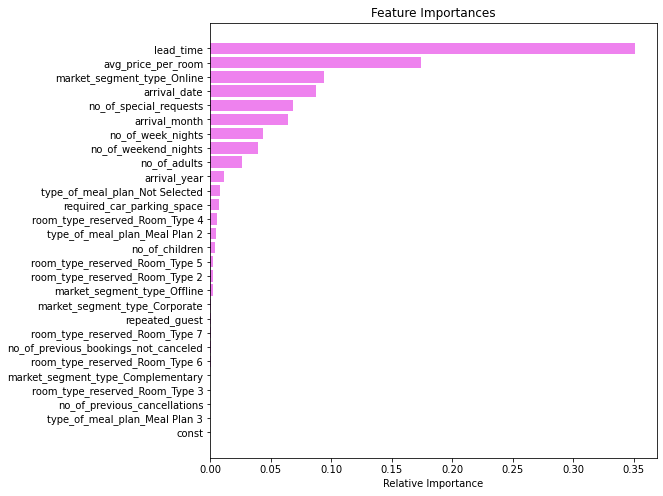

In [ ]:
#before pruning, let's check the important features
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

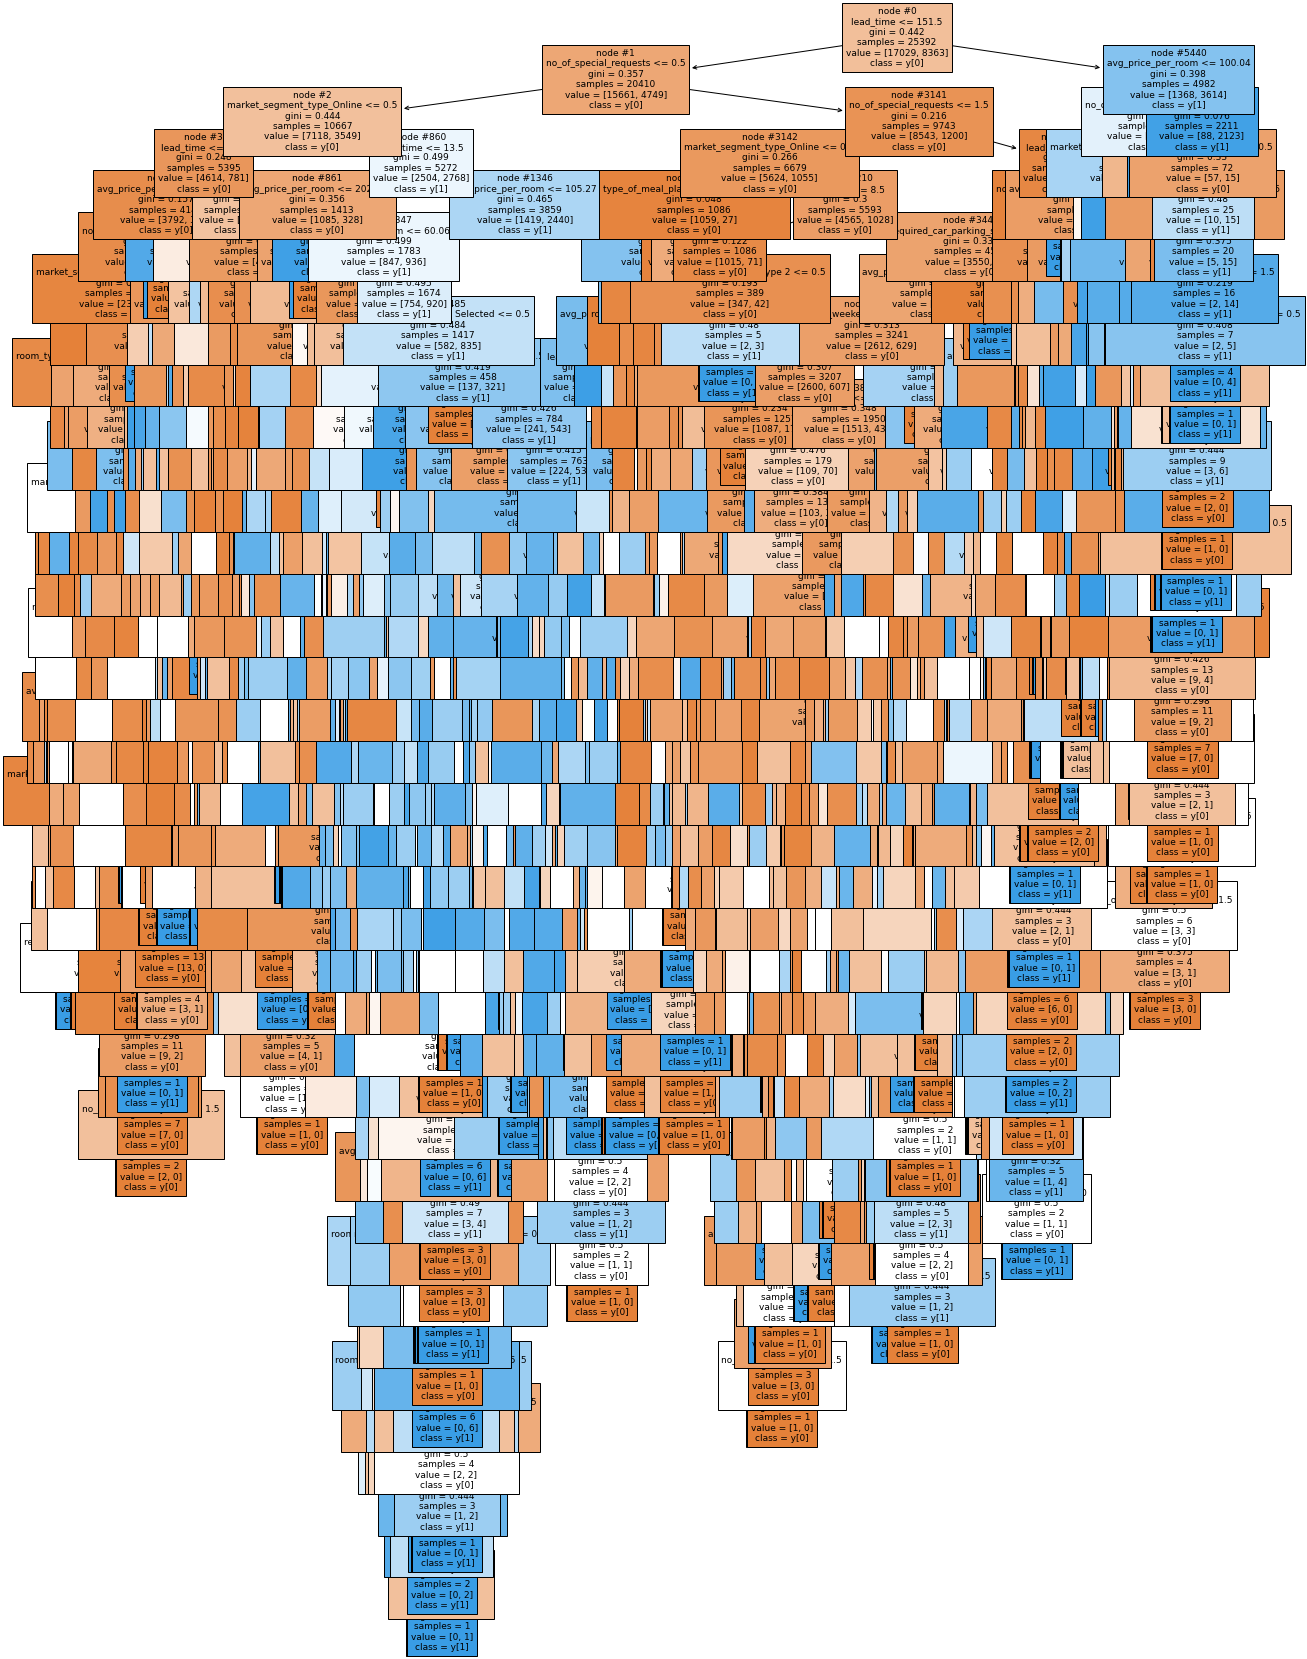

In [ ]:
#visulizing the tree
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names = feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

**This is a VERY complex tree.**

**The most important feature to determine if a guest will cancel their booking is the lead time for the reservation. This factor has a .35 relative importance. The next closest factor at 0.18 would be the price of the room. The next 2 factors are close at around 0.10 each and those are the online bookings and the arrival date of the guest.**

## Do we need to prune the tree? **Yes**

In [ ]:
#We will preprune the tree to try and avoid overfitting and the excessive complexity of the above tree.
# setting the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

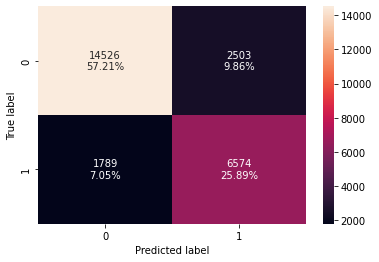

In [ ]:
#Checking the performance on the training set
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
#Checking the performance on the training set
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83097,0.78608,0.72425,0.75390


**Recall dropped significantly from 0.986 to 0.786.**

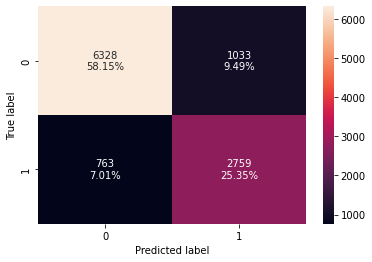

In [ ]:
#Checking the performance on the testing set
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
#Checking the performance on the testing set
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


**The consistency of the data between the testing and training sets suggests that we no longer have a problem with overfitting. I would like to see recall higher than .78.**

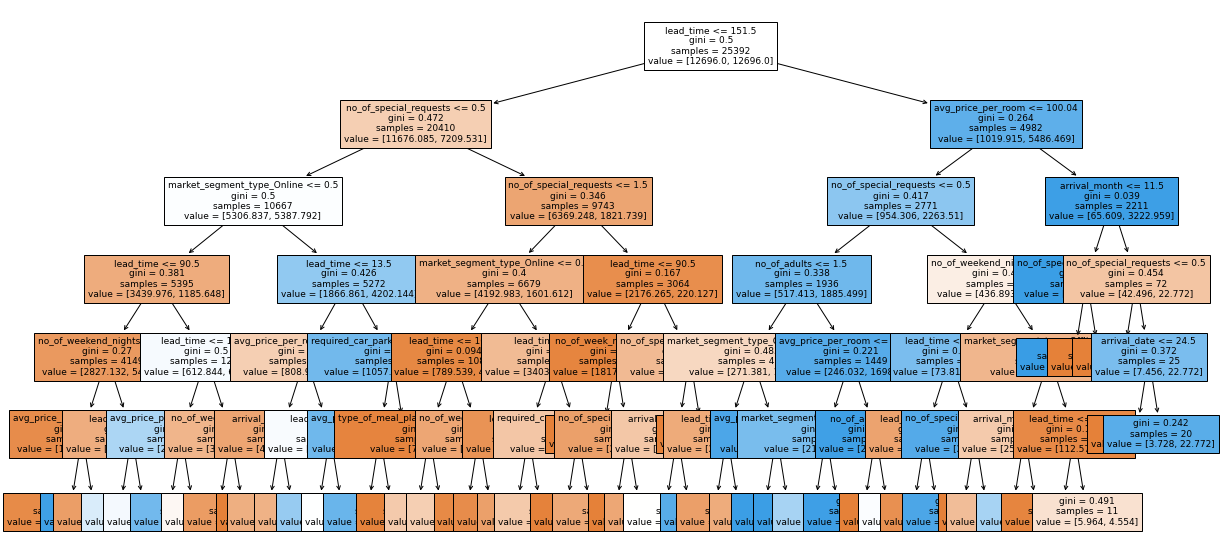

In [ ]:
#Visulizing the pruned tree
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text displaying the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

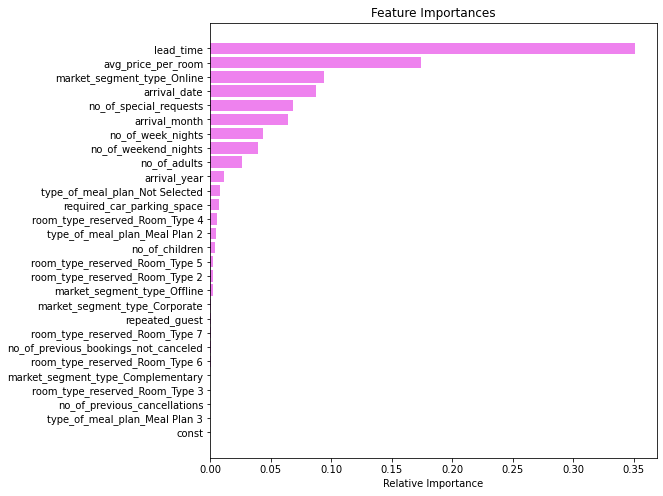

In [ ]:
#importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
#We will continue to prune the tree in an effort to increase the recall and minimize false negatives
#Total impurity of leaves vs effective alphas of pruned tree
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1837,0.00890,0.32806
1838,0.00980,0.33786
1839,0.01272,0.35058
1840,0.03412,0.41882


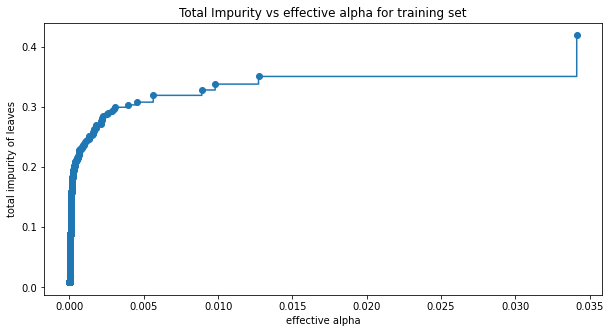

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

**Using the effective alphas we will prune a different tree to compare outcomes.**

In [ ]:
#Building a tree using minimum cost complexity pruning
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136932


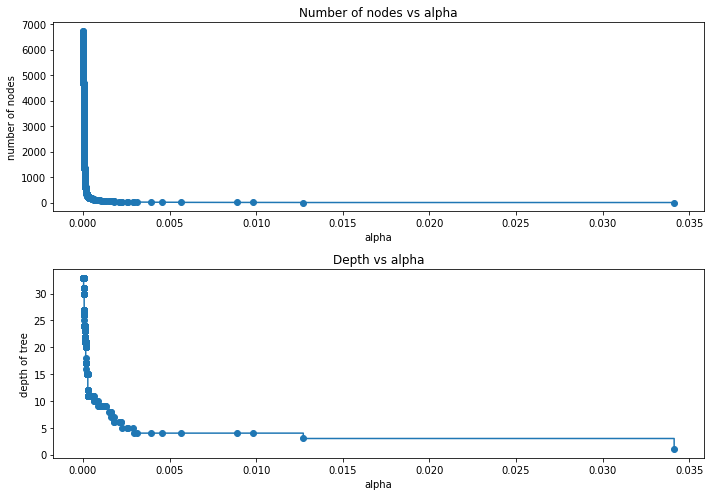

In [ ]:
#removing the last node because it is only node
#visulizing the tree depth and alpha coorelation
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**As expected, as the number of nodes and tree depth decreases, the alpha increases.**

In [ ]:
#comparing the f1 vs alpha for training and testing sets
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

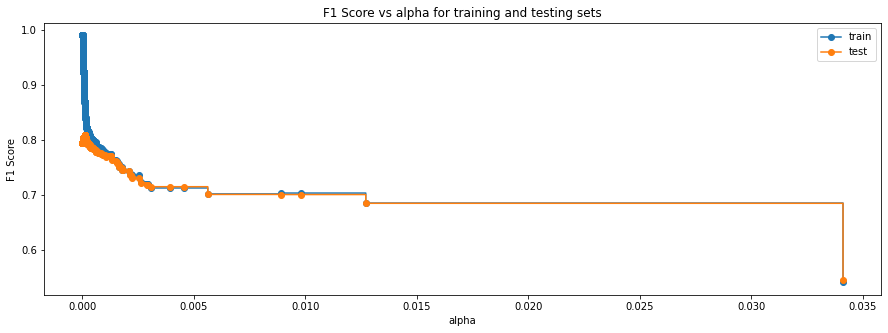

In [ ]:
#plotting those results
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
#creating a model with the highest test and training recall
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001333884457584511, class_weight='balanced',
                       random_state=1)


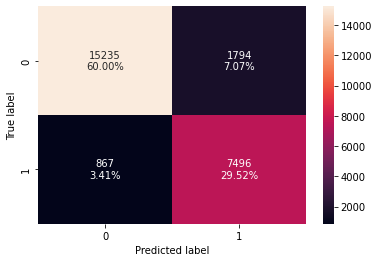

In [ ]:
#Checking the training data using the best model
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89520,0.89633,0.80689,0.84926


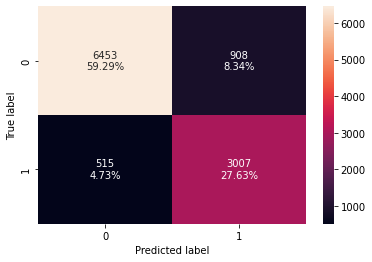

In [ ]:
#Checking the testing data using the best model
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.86925,0.85378,0.76807,0.80866


**In the post pruned tree, the training recall is 0.896 and the testing recall is 0.853. With both being in the same high amount, the model is performing well on unseen data.**

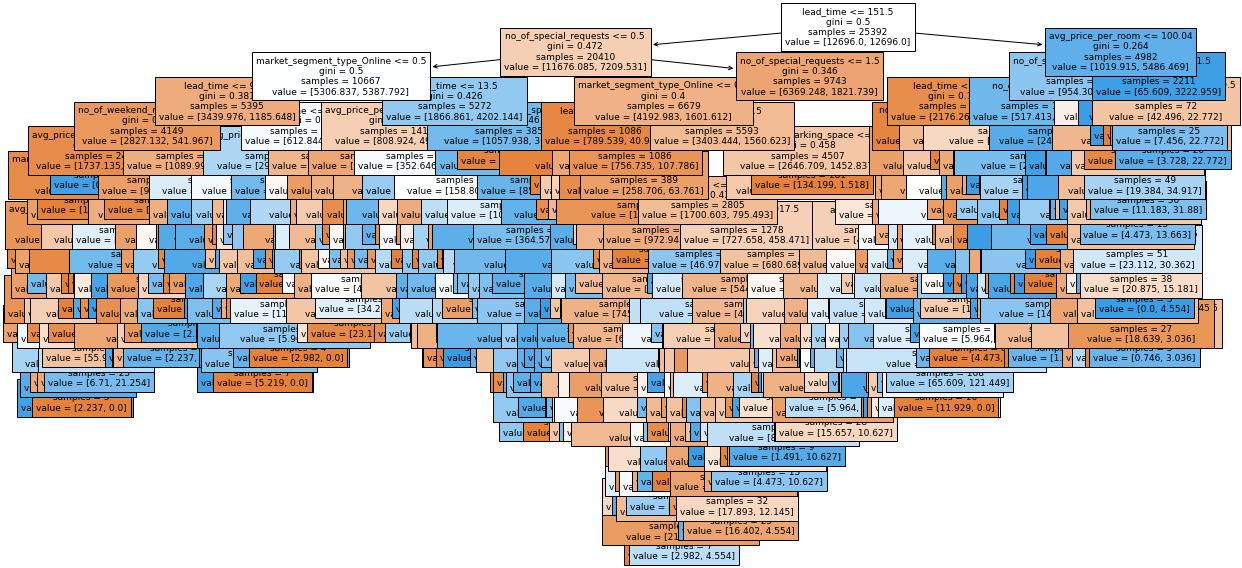

In [ ]:
#Visualize the best model tree
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

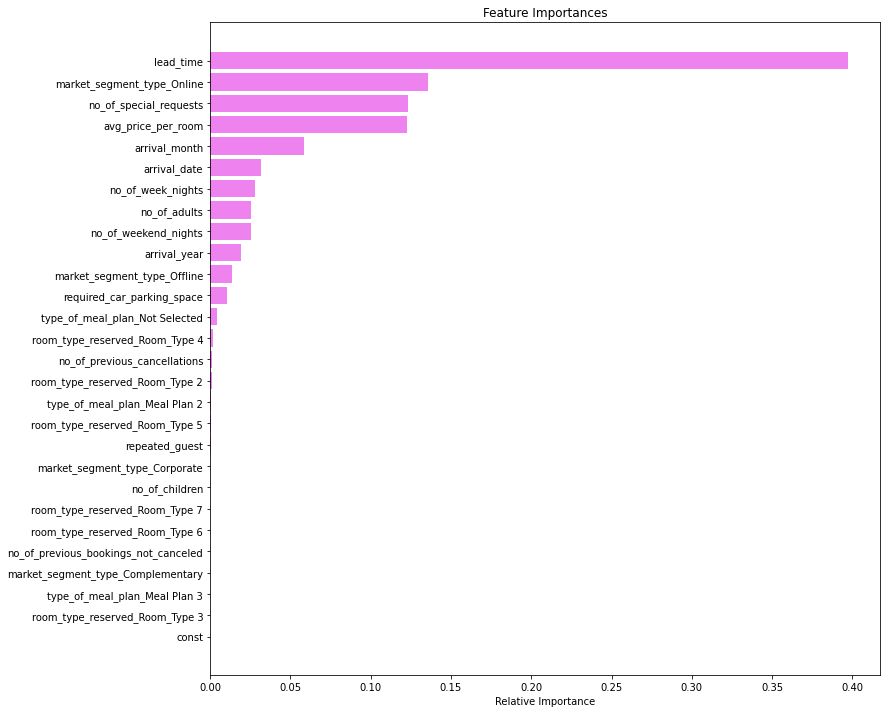

In [ ]:
#Visualizing the important features on the best model
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**The most important factors in the post pruned tree are:**
1.   Lead Time
2.   Number of Special Requests
3.   Avg Price of Room
4.   Arrival Month





## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83097,0.89520
Recall,0.98661,0.78608,0.89633
Precision,0.99578,0.72425,0.80689
F1,0.99117,0.75390,0.84926


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87237,0.83497,0.86925
Recall,0.81715,0.78336,0.85378
Precision,0.79437,0.72758,0.76807
F1,0.80560,0.75444,0.80866


**The sklearn training tree is overfit because the performance numbers are extremely close to 1 and the significant differences between the testing and training numbers. The best model for recall which will minimize the number of false negatives is found in the Post-Pruning model on both the testing and training data.**

**-The model built can be used to predict if a guest will cancel their reservation and can correctly identify 85% of the cancellations.**

-----The most important factor (with a realtive importance of 40%) of whether a cancellation will happen is related to lead time. A lead time of under 50 days leads to fewer cancellations than those with 50 or more days lead time. In general, the longer the lead time the more likely the guest is to cancel the reservation.

-----The second most important factor (with a relative importance of 15%) of whether a cancellation will happen is whether the reservation was booked online. 64% of all bookings were done online and have a higher rate of cancellations compared to other market segments.

----The thrid most important factor (with a relative importance of approximately 13%) of whether a cancellation will happen is the number of special requests required by the guest. Guests with over 3 special requests did not cancel any of their appointments. In general, the as the number of special requests rises, the number of cancellations drop.

----The forth most important factor (with a relative importance of approximately 13%) of whether a cancellation will happen is the average price of the room. Online reservations tend to be the most expensive market segment and are a contibuting factor in cancellations as outlined above. The more expensive the room, the higher chance of a cancellation.

----The fifth most important factor (with a relative importance of 8%) of whether a cancellation will happen is the arrival month of the reservation. There are more cancellations that happen in the summer months and less in the winter. However, there are less overall guests in the winter and the rooms are cheaper during that time frame as well. The most popular months are October and September.Both of these months have moderate levels of cancellations but no where near the highest levels.|

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

*Excessive lead time is a major factor influencing cancellations. The hotels might only allow guests to book up to 100 days in advance of their travels or impose a higher cancellation penalty for reservations that are made more than 50 days in advance of their stay.  

*The majority of online bookings were made within 100 days of travel so to combat the high number of online cancellations, the hotel might impose higher cancellation penalties for all online bookings as well as an additional non-refundable fee for booking online.

*Since guests are less likely to cancel their reservation with an increased number of special requests, train your staff to offer these requirements during the booking process. This could include celebrating a birthday or anniversary, the need of a roll away cot or microwave for the room, etc.

*With the combination of the increased price per room and increase in cancellations in the summer months, the hotel might impose steeper cancellation fees for the summer months or run a multiday special at a lower price per room during the summer months in order retain more guests to supercede the level of cancellations during that time of year. 

*The hotel should capitalize on September, October and November because of the popularity of the hotels during those months and the dropping price per room. This time of year has the most room for market growth through offering special pricing and offering special requirements at no extra cost. 

*The winter months see a drop in price per room as well as number of guests. There are very few cancellations during this time. Promoting holiday celebrations or other indoor activities during the winter months might bring more guests to the hotels during this slower time of year. 